In [2]:
# --- Project Setup ---
from setup_notebook import setup_project_root
setup_project_root()

import pickle
import matplotlib.pyplot as plt
from src.project_config import RAW_DIR, N_OUT_PROTEIN_ID, PROTEIN_IDS_CSV, PROCESSED_DIR
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

## Exploration of DSSP datasets from Tim and me.

### 0. Exploring Dataset

In [3]:
# Load the .pkl dataset 
with open(RAW_DIR / '0000DSSP_result_complete_dict.pkl', 'rb') as f:
    data = pickle.load(f)

with open(PROCESSED_DIR / "DSSP_HUMAN_PROTEOME.pkl", 'rb') as d:
    data2 = pickle.load(d)

In [12]:
data["P16150"][300] == data2["P16150"][300]  # Check if the data matches

True

: 

In [6]:
# Learning accessing the nested dictionary
# 1. returns all the keys in the dictionary
print(data.keys())
# 2. returns all the keys (residue position) for a specific protein ID
print(data["P05067"].keys())
# 3. return all the values 
print(data["P05067"].values())
# 4. how many proteins are there
print(f"Number of proteins: {len(data2.keys())}")

dict_keys(['Q16846', 'P00004', 'P00008', 'P00334', 'P00698', 'P00711', 'P01274', 'P01317', 'P01857', 'P02467', 'P02662', 'P02668', 'P02769', 'P09889', 'P10915', 'P24627', 'P53621', 'P59676', 'P61823', 'P68082', 'Q62226', 'Q10735', 'P07988', 'P20142', 'P05067', 'P56817', 'P97952', 'Q02297', 'Q14242', 'Q56A07', 'Q64685', 'Q7M729', 'Q8BHK2', 'P00794', 'P01023', 'P02666', 'P02669', 'P04468', 'P06796', 'P07498', 'P19442', 'P02670', 'P01015', 'P01019', 'P11859', 'P20757', 'A2A8Z1', 'D3Z6P0', 'E9Q1P8', 'O00585', 'O08585', 'O08638', 'O08709', 'O08788', 'O08808', 'O08997', 'O09131', 'O09159', 'O35226', 'O35326', 'O35522', 'O35593', 'O35639', 'O35640', 'O35737', 'O35864', 'O54824', 'O54879', 'O54962', 'O54988', 'O55131', 'O70310', 'O70456', 'O70492', 'O70566', 'O70591', 'O70622', 'O88342', 'O88456', 'O88569', 'O88844', 'O88990', 'O89017', 'O89053', 'O89086', 'O89090', 'P00747', 'P01011', 'P01034', 'P01042', 'P01189', 'P01236', 'P01237', 'P01887', 'P01966', 'P02070', 'P02301', 'P02453', 'P02465',

In [8]:
# Access position and secondary strucuture.
for i in range(77):
    print(f"Position: {data2["P05067"][i+1][0]}, Structure: {data2["P05067"][i+1][2]}, rASA: {data2["P05067"][i+1][3]}")


Position: 1, Structure: -, rASA: 1.0
Position: 2, Structure: -, rASA: 1.0
Position: 3, Structure: -, rASA: 0.875
Position: 4, Structure: -, rASA: 0.7738095238095238
Position: 5, Structure: -, rASA: 1.0
Position: 6, Structure: -, rASA: 0.8679245283018868
Position: 7, Structure: -, rASA: 0.926829268292683
Position: 8, Structure: -, rASA: 0.8597560975609756
Position: 9, Structure: -, rASA: 0.8658536585365854
Position: 10, Structure: -, rASA: 0.8902439024390244
Position: 11, Structure: -, rASA: 0.8490566037735849
Position: 12, Structure: -, rASA: 0.8490566037735849
Position: 13, Structure: -, rASA: 1.0
Position: 14, Structure: -, rASA: 0.9295774647887324
Position: 15, Structure: -, rASA: 0.9150943396226415
Position: 16, Structure: -, rASA: 1.0
Position: 17, Structure: -, rASA: 0.8679245283018868
Position: 18, Structure: -, rASA: 0.9451219512195121
Position: 19, Structure: -, rASA: 1.0
Position: 20, Structure: -, rASA: 0.7746478873239436
Position: 21, Structure: -, rASA: 0.9411764705882353


{1: (1, 'M', '-', 1.0, 360.0, 162.5, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0), 2: (2, 'L', '-', 1.0, -70.6, 170.1, 1, -0.1, 2, -0.1, 2, -0.0, 0, 0.0), 3: (3, 'P', '-', 0.875, -130.8, -156.7, 0, 0.0, -1, -0.1, 0, 0.0, 2, -0.0), 4: (4, 'G', '-', 0.7738095238095238, 119.2, 146.1, -2, -0.1, 2, -0.1, 2, -0.0, -2, -0.0), 5: (5, 'L', '-', 1.0, 108.5, 107.3, -2, -0.0, 2, -0.2, 0, 0.0, 0, 0.0), 6: (6, 'A', '-', 0.8679245283018868, -174.3, 143.2, -2, -0.1, -2, -0.0, 1, -0.1, 0, 0.0), 7: (7, 'L', '-', 0.926829268292683, -161.1, 145.0, -2, -0.2, -1, -0.1, 1, -0.1, 0, 0.0), 8: (8, 'L', '-', 0.8597560975609756, 2.0, 154.8, 0, 0.0, -1, -0.1, 0, 0.0, 0, 0.0), 9: (9, 'L', '-', 0.8658536585365854, -170.3, -164.1, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0), 10: (10, 'L', '-', 0.8902439024390244, -161.3, 140.7, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0), 11: (11, 'A', '-', 0.8490566037735849, 14.1, 136.2, 1, -0.0, 2, -0.1, 0, 0.0, 0, 0.0), 12: (12, 'A', '-', 0.8490566037735849, -161.7, 132.2, 0, 0.0, -1, -0.0, 0, 0.0, 0, 0.0), 13: (13,

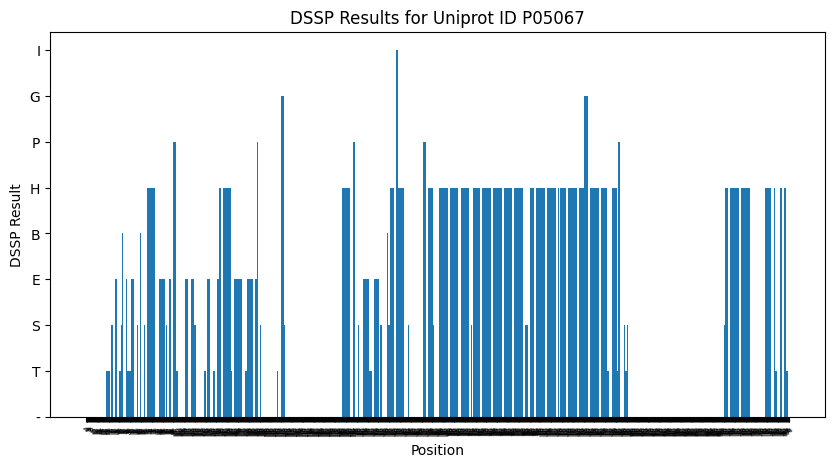

In [35]:
# Extracting the positions and values for plotting
positions = list(value.keys())
dssp_values = [dssp_result[2] for dssp_result in value.values()]

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(positions, dssp_values)
plt.xlabel('Position')
plt.xticks(size=4, rotation=45, fontweight='light')
plt.ylabel('DSSP Result')
plt.title('DSSP Results for Uniprot ID P05067')
plt.xticks(positions)
plt.show()

Code	Description
H	Alpha helix
B	Beta bridge
E	Strand
G	Helix-3
I	Helix-5
T	Turn
S	Bend

### 1. What Proteins are in the dataset


In [10]:
# 1. returns all the keys in the dictionary
data.keys()
#N_OUT_PROTEIN_ID, PROTEIN_IDS_CSV
nout_ID = pd.read_csv(N_OUT_PROTEIN_ID)
human_ID = pd.read_csv(PROTEIN_IDS_CSV)     #"Protein_ID"
human_am_ID = pd.read_csv(PROCESSED_DIR / "Protein_IDs_per_Experiment" / "AlphaMissense_csv.csv")
output_path = PROCESSED_DIR / "Protein_IDs_Per_Experiment" / "DSSP_HUMAN_NOUT_IDs.csv"



count = 0
entry = []

for protein in tqdm(nout_ID["entry"]):
    if protein in data2.keys():
        # save protein_id in CSV file 
        entry.append(protein)
        count += 1

entry_df = pd.DataFrame(entry, columns=['entry'])
entry_df.to_csv(output_path, index=False, header=['entry'])
print(f"Total proteins found in the dataset: {count}")


  0%|          | 0/1534 [00:00<?, ?it/s]

Total proteins found in the dataset: 1516


In [ ]:
count = 0
for uniprot_id in data.keyss
    print(uniprot_id)

print(count)

In [33]:

for i in range(720):
    print(f"Position: {data["P05067"][i+1][0]}, Structure: {data["P05067"][i+1][2]}")


Position: 1, Structure: -
Position: 2, Structure: -
Position: 3, Structure: -
Position: 4, Structure: -
Position: 5, Structure: -
Position: 6, Structure: -
Position: 7, Structure: -
Position: 8, Structure: -
Position: 9, Structure: -
Position: 10, Structure: -
Position: 11, Structure: -
Position: 12, Structure: -
Position: 13, Structure: -
Position: 14, Structure: -
Position: 15, Structure: -
Position: 16, Structure: -
Position: 17, Structure: -
Position: 18, Structure: -
Position: 19, Structure: -
Position: 20, Structure: -
Position: 21, Structure: -
Position: 22, Structure: -
Position: 23, Structure: -
Position: 24, Structure: T
Position: 25, Structure: T
Position: 26, Structure: T
Position: 27, Structure: T
Position: 28, Structure: -
Position: 29, Structure: S
Position: 30, Structure: S
Position: 31, Structure: -
Position: 32, Structure: -
Position: 33, Structure: E
Position: 34, Structure: E
Position: 35, Structure: E
Position: 36, Structure: -
Position: 37, Structure: -
Position: 